<a href="https://colab.research.google.com/github/ranjith13119/ML-and-DataScience/blob/main/GBR_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Titani-kaggle/train.csv")

In [ ]:
df.drop(['Name', 'Cabin', 'Ticket'], axis = 1, inplace= True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

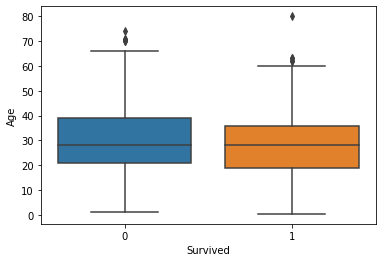

In [ ]:
sns.boxplot(x = df.Survived, y = df.Age)

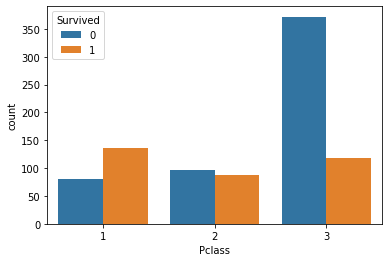

In [ ]:
sns.countplot(x=df.Pclass, hue = df.Survived)

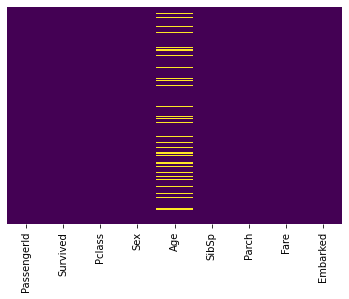

In [ ]:
sns.heatmap(data = df.isnull(), yticklabels = False, cbar = False, cmap='viridis')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


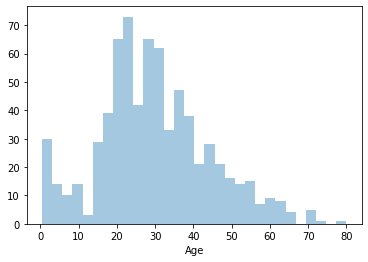

In [ ]:
sns.distplot(df["Age"].dropna(), kde = False, bins = 30)

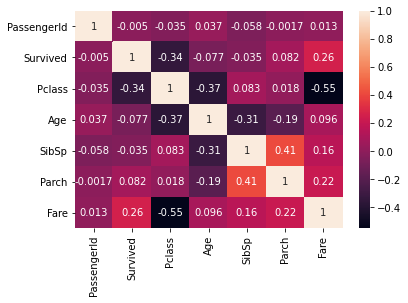

In [ ]:
sns.heatmap(df.corr(), annot = True) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


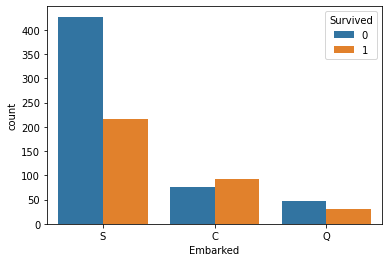

In [ ]:
sns.countplot(df.Embarked, hue=df.Survived)

In [ ]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [ ]:
df.Age.fillna(df.Age.median(), inplace = True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall':make_scorer(recall_score)}


In [ ]:
df.drop(['PassengerId'], inplace= True, axis = 1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
y = df["Survived"].values
X = df.iloc[:, 1:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [ ]:
classifier = GradientBoostingClassifier()

In [ ]:
parameters = {
      "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
      "min_samples_split": np.linspace(0.1, 0.5, 10),
      "min_samples_leaf": np.linspace(0.1, 0.5, 10),
      "max_depth":[3,5,8],
      "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
      "n_estimators":[10]
    }

clf = GridSearchCV(classifier, parameters,scoring=scoring,refit=False,cv=2, n_jobs=4, verbose = 3)

In [ ]:
grid_result = clf.fit(X_train, y_train)

Fitting 2 folds for each of 14700 candidates, totalling 29400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 824 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 2104 tasks      | elapsed:   14.3s
[Parallel(n_jobs=4)]: Done 3896 tasks      | elapsed:   25.9s
[Parallel(n_jobs=4)]: Done 6200 tasks      | elapsed:   41.4s
[Parallel(n_jobs=4)]: Done 9016 tasks      | elapsed:   60.0s
[Parallel(n_jobs=4)]: Done 12344 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 16184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 20536 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 25400 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 29400 out of 29400 | elapsed:  3.2min finished


In [ ]:
df1=pd.DataFrame.from_dict(clf.cv_results_)
df1

#here Possible inputs for cross validation is cv=2, there two split split0 and split1
df1[['split0_test_accuracy','split1_test_accuracy','split0_test_precision','split1_test_precision','split0_test_recall','split1_test_recall']]
df1['accuracy_score']=(df1['split0_test_accuracy']+df1['split1_test_accuracy'])/2

df1.loc[df1['accuracy_score'].idxmax()]['params']

{'learning_rate': 0.15,
 'max_depth': 8,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.14444444444444446,
 'n_estimators': 10,
 'subsample': 0.95}

In [ ]:
#https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

clf_best =GradientBoostingClassifier(
    learning_rate =  0.15,
    max_depth =  8,
    min_samples_leaf = 0.1,
    min_samples_split= 0.14444444444444446,
    n_estimators = 10,
    subsample = 0.95)
clf_best.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1,
                           min_samples_split=0.14444444444444446,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Predictions = clf_best.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       110
           1       0.86      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.82      0.75      0.76       179
weighted avg       0.81      0.79      0.78       179



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))


[[104   6]
 [ 31  38]]


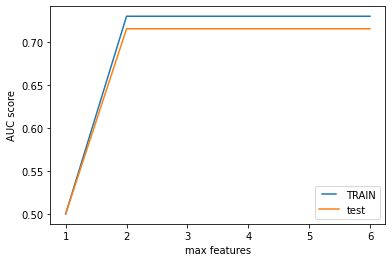

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc
train_results = []
test_results = []
#max_feature = list(range(1,X_train.shape[1]))
max_feature = list(range(1, 10))
for i in max_feature:
  clf_best = GradientBoostingClassifier(
    learning_rate =  0.15,
    max_depth =  8,
    min_samples_leaf = 0.1,
    min_samples_split= 0.14444444444444446,
    n_estimators = i,
    subsample = 0.95)
  clf_best.fit(X_train, y_train)
  train_pred = clf_best.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = clf_best.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_feature, train_results, label = "TRAIN")
line2, = plt.plot(max_feature, test_results, label = "test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

In [ ]:
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
# number of feature to be consider at every split
max_features = ['auto', 'sqrt', 'log2']

#Max number of levels in tree
max_depth = [int(x) for x in np.linspace(10 , 1000, 10)]
min_samples_split = [1, 3, 4, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]

parameters_xgb = {
      "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
      "min_samples_split": min_samples_split,
      "min_samples_leaf": min_samples_leaf,
      "max_depth": max_depth, 
      "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
      "n_estimators": n_estimators,
      'criterion' : ['entropy', 'gini']
    }

clf_xgb = GridSearchCV(xgb, parameters_xgb,scoring=scoring, refit = False, cv=3, n_jobs = -1, verbose = 2)

In [ ]:
clf_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 294000 candidates, totalling 882000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 57.8min
